# Social, gender and study data from secondary school students
#### By: Hanan Amer
<img width=200px style="float:left; margin: 5px 5px 0 0" src="https://foodallergycanada.ca/wp-content/uploads/iStock-471800567-768x512.jpg"></img> 

The dataset that we are using, displays Portuguese secondary students and different factors which might affect their academic progress. The dataset includes 395 students, and has 30 independent variables and 3 dependent variables (G1, G2, and G3). This dataset is interesting because it shows how different factors affect the students’ performance in school. It’s relevant to data science because we can use this information to observe what steps we can take to help a student have a successful academic career. In this analysis, we will be going through comparisons between hours spent studying, number of absences, having a tutor, coming from an educated family and its effect on grades. We also will analyse whether having a longer commute to school affects one’s grades. As a result, if teachers noticed a student is performing poorly, they can use our analysis to effectively assist the student live to his or her fullest potential.


In [1]:
import numpy as np # importing the numpy library 
import matplotlib.pyplot as plt # library for ploting data
import pandas as pd # panda library used to construct and edit dataframes
%matplotlib inline

### About the Portuguese education system
The Portuguese education system divides each semester into 3 terms, G1, G2, and G3. They use a 20-point grading system where a score above 10 is passing, 10-13 is a C, 14-15 is a B, 16-17 is a A, and an 18-20 is an A+. In the below cell, we figure out the final mark by calculating the average of all the grades per student. 

In [2]:
# Reading in the data set
df = pd.read_csv("student-mat.csv")
pd.options.display.max_columns = None # Getting the maximum number of columns
df['FinalGrade'] = (df.G1+df.G2+df.G3)/3 # creating a new column that includes the mean of all the tests
df.head(2) #  obtaining the head of the data set

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,FinalGrade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,5.333333


In [3]:
# Finding the total number of rows and columns of the data set
column,row = df.shape
print("Columns: ", column)
print("Rows: ", row)

Columns:  395
Rows:  34


##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Does studying for a longer period of time have an effect on your overall grade?
In this cell below, we compare the number of hours a student spends studying with his final grade. We took the students who studied less than 2 hours, 2-5 hours, 5-10 hours, and greater than 10 hours a week and grouped them accordingly. Then we calculated the mean grade for each group to determine whether the number of hours spent studying per week affects the students’ final grade.

In [4]:
newCopy = pd.DataFrame(df) # Make a copy of the initial dataframe
# Picking out individual studytimes and then using groupby to calculate the mean average in that category 
TwoHours= newCopy[newCopy.studytime == 1]
FiveHours= newCopy[newCopy.studytime == 2]
TenHours= newCopy[newCopy.studytime == 3]
PlusTenHours= newCopy[newCopy.studytime == 4]

First = TwoHours.groupby(['studytime']).agg({'FinalGrade': 'mean'})
Second = FiveHours.groupby(['studytime']).agg({'FinalGrade': 'mean'})
Third = TenHours.groupby(['studytime']).agg({'FinalGrade': 'mean'})
Fourth = PlusTenHours.groupby(['studytime']).agg({'FinalGrade': 'mean'})
Final = pd.concat([First,Second,Third,Fourth]).reset_index()
Final

,studytime,FinalGrade
0,1,10.253968
1,2,10.442761
2,3,11.651282
3,4,11.728395


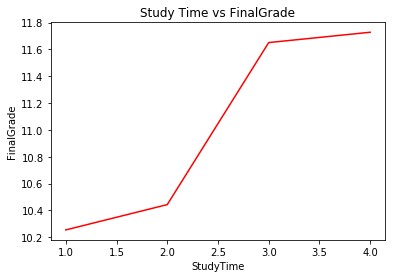

In [5]:
# plotting the relationship between studytime and finalgrade
plt.plot(Final['studytime'],Final['FinalGrade'], color = 'red');
plt.title('Study Time vs FinalGrade');
plt.xlabel('StudyTime');
plt.ylabel('FinalGrade');

Based on the results that we acquired, we can conclude that studying does have an impact on academic performance. As seen in the table, groups that performed well have a longer study period. Thereafter, we can conclude studying more does indeed affect the final grade of the students. 

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Finding the correlation
We were curious what the relation between absences and final grades were, so we decided to plot the number of absences on the y-axis and their final grade on the x-axis. Our hypothesis is that the number of absences are going to have a strong correlation with the final grades.

In [6]:
# Finding the correlation between absences and Final grade
new = df.corr()
new.loc['absences','FinalGrade']

-0.005908806132303025

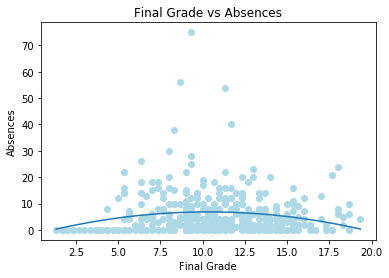

In [7]:
# plotting the relationship between Final grades and absences
plt.scatter(df.FinalGrade,df.absences, color = 'lightblue');
plt.plot(np.unique(df.FinalGrade), np.poly1d(np.polyfit(df.FinalGrade, df.absences, 2))(np.unique(df.FinalGrade)));
plt.title('Final Grade vs Absences');
plt.xlabel('Final Grade');
plt.ylabel('Absences');

We were expecting a strong correlation between the two but surprisingly we discovered a Pearson correlation coefficient of -0.0059, meaning there was no relationship between the two. The scatter plot we made allows us to see there was an even spread of absences throughout the range of the final grade. There were a couple of outliers which may have occurred. There was no significant information here so we could not use it to support our initial objective. 

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Would having educated parents reflect on ones grade?
In the following cell, we grouped the students according to their parent’s education level. We had a group for each possible combination of the student’s parent’s education. We are testing this out because we suspect the education level of the parents would reflect their children’s academic success. On the chart, 0 is no education, 1 is primary education, 2 is middle school, 3 is secondary school, 4 is post secondary education. We then ordered the parents from the least educated to most educated. Then we plotted the graph with the index on the x-axis and the final grades on the y-axis. We used the index because we couldn’t plot two numbers on one x-axis, so we used indexes to represent the combination of the mother’s and father’s education. 

In [8]:
# Make a copy of the initial dataframe
CopyFrame = pd.DataFrame(df)
# Using groupby on the level of education for the student's Mother and Father and finding the mean of the final grade for every possible combination
MothFath = CopyFrame[CopyFrame.Medu & CopyFrame.Fedu >= 0]
Final = MothFath.groupby(['Medu','Fedu']).agg({'FinalGrade': 'mean'}).reset_index()
Final

,Medu,Fedu,FinalGrade
0,0,1,8.000000
1,0,2,14.833333
2,1,0,14.666667
3,1,1,8.765766
4,1,2,10.000000
5,1,3,8.133333
6,1,4,13.000000
7,2,1,9.523810
8,2,2,10.084967
9,2,3,10.705882


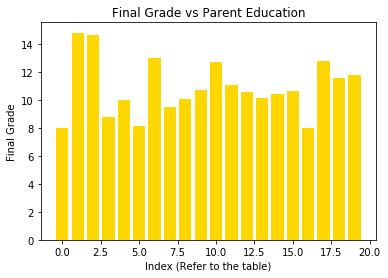

In [9]:
# plotting the relationship final grade and parent education
plt.bar(Final.index,Final['FinalGrade'],color = 'gold');
plt.title('Final Grade vs Parent Education');
plt.xlabel('Index (Refer to the table)');
plt.ylabel('Final Grade');


From the scatter plot we can see the data is fairly scattered, there are high and low grades at both ends of the x-axis, we can conclude there is no significant relationship between parents being educated and the student’s final grades.
### --------------------------------------------------------------------------------------------------------------------------------------------------------------

# Does tutoring help?
We hypotheses the students who go to tutoring are better off academically. To test this hypothesis, we grouped the students into two groups, those who go to a paid tutor and those who don’t. Then, we found the average of all the students.

In [10]:
# copy of the data set
CopyFrame = pd.DataFrame(df)
# Using groupby on the paid column to investiage if paid 
done = CopyFrame[CopyFrame.paid == 'yes']
notdone = CopyFrame[CopyFrame.paid == 'no']
Yes = done.groupby(['paid']).agg({'FinalGrade': 'mean'})
No = notdone.groupby(['paid']).agg({'FinalGrade': 'mean'})
Final = pd.concat([Yes,No]).reset_index()
Final

,paid,FinalGrade
0,yes,11.038674
1,no,10.375389


From the results we can see the tutored group performed better with a mean score of 11.04, whereas the group which wasn’t tutored has an average of 10.38. This is not a substantial difference however it does still supports our hypothesis. 

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

## Can commuting cause lower grades? 
We tested whether students who had a long commute to school had poor performance at school. We suspect students who commute longer times spend less time studying. We grouped the students according to the amount of time they spend commuting. Then we find the average final grade for each group and the average number of failed classes.

In [11]:
newCopy = pd.DataFrame(df) # Make a copy of the initial dataframe
# Picking out individual traveltime and then using groupby to calculate the mean average of final grade and failures
FifteenMin= newCopy[newCopy.traveltime== 1]
ThirtyMin= newCopy[newCopy.traveltime == 2]
OneHour= newCopy[newCopy.traveltime == 3]
OneHour2= newCopy[newCopy.traveltime == 4]

First = FifteenMin.groupby(['traveltime']).agg({'FinalGrade': 'mean','failures': 'mean'})
Second = ThirtyMin.groupby(['traveltime']).agg({'FinalGrade': 'mean','failures': 'mean'})
Third = OneHour.groupby(['traveltime']).agg({'FinalGrade': 'mean','failures': 'mean'})
Fourth = OneHour2.groupby(['traveltime']).agg({'FinalGrade': 'mean','failures': 'mean'})
Final = pd.concat([First,Second,Third,Fourth]).reset_index()
Final

,traveltime,FinalGrade,failures
0,1,10.979248,0.299611
1,2,10.295950,0.355140
2,3,9.855072,0.478261
3,4,8.541667,0.750000


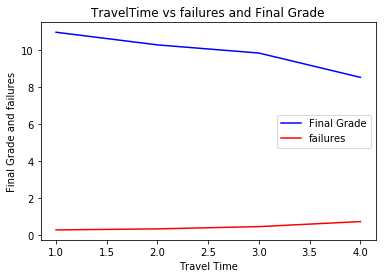

In [12]:
# plotting the travelTime vs failures and Final Grade
plt.plot(Final.traveltime,Final.FinalGrade, '-b', label='Final Grade');
plt.plot(Final.traveltime, Final.failures, '-r', label='failures');
plt.title('TravelTime vs failures and Final Grade');
plt.xlabel('Travel Time');
plt.ylabel("Final Grade and failures");
plt.legend(loc='right');

In the chart we generated, we can see the grades decrease as the time for commuting increases, the number of failures also increases. 

# Conclusion:
Our objective for these analyses is to help struggling students improve. We intend to do this by isolating factors that may contribute to better grades. From all of our analyses, we found many interesting connections in our dataset. We combined the 3 terms to get our final grade. We compared the number of hours spent studying with the final grade, and we came to the conclusion that the students who studied for a longer period of time tend to have a higher grade. From our analysis, we found studying between 5 and 10 hours per week provided the best ratio of improvement. When we were testing the correlation between the number of absences and final grade, we found a Pearson correlation coefficient of -0.0059 which proved to have no significant correlation between the two. The next test was with the student’s parent’s level of education and the student’s final grade. Our hypothesis was the parent’s level of education would reflect on their child’s performance at school. After our analysis we concluded there was no significant relationship between parents being educated and the students’ final grades. This can be motivational for students who think because they come from an uneducated family, they won’t be able to succeed academically, this data shows them there is nothing holding them back. After, we analysed students who went to tutors and those who didn’t, we came to the conclusion that going to a tutor is a factor which helps improve a student’s grade. We also analysed the effect of different commute times on final grades and classes failed. We found as the commute time goes up the student’s final grade drops and failed classes increases. This might be because the student spends more time commuting, resulting in having less time for other activities including studying. 

### ---------------------------------------------------------------------------------------------------------------------------------------------------------------

In [13]:
maxFinalGrade = df.loc[df['FinalGrade'].idxmax()] # Finding the maximum row with highest final grade
newData = pd.DataFrame(maxFinalGrade)
newData = newData.T # Change the rows to columns (and columns to rows)
newData

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,FinalGrade
47,GP,M,16,U,GT3,T,4,3,health,services,reputation,mother,1,4,0,no,no,no,yes,yes,yes,yes,no,4,2,2,1,1,2,4,19,19,20,19.3333


In [14]:
maxFinalGrade = df.loc[df['FinalGrade'].idxmin()] # Finding the minimum row with lowest final grade
newData = pd.DataFrame(maxFinalGrade)
newData = newData.T # Change the rows to columns (and columns to rows)
newData

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,FinalGrade
137,GP,F,16,U,GT3,A,3,3,other,other,course,other,2,1,2,no,yes,no,yes,no,yes,yes,yes,4,3,2,1,1,5,0,4,0,0,1.33333


#### To prove the accuracy our analysis, we decided to pick out the most successful student in our dataset along with least successfully student. We were stunned by how accurate the analysis we made. For example, the student that received the highest grade has the been studying for many hours a week, having highly educated parents and has commuted the minimal amount of time. On the other hand, a student with a lower grade has done the oppiosite.